## Train and explain a model

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../data/seattle_sample_500.csv")

In [3]:
data = gpd.GeoDataFrame(
    data, crs="EPSG:32610", geometry=gpd.points_from_xy(x=data.UTM_X, y=data.UTM_Y))

In [4]:
y = data.log_price

X_coords = data[['bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'condition',
                 'waterfront', 'view', 'age','UTM_X', 'UTM_Y']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_coords, y, random_state=1)

## Model training

In [6]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=10, random_state=0)
rf_model.fit(X_train.values, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test, rf_model.predict(X_test))

/Users/ziqili/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.6766668655394555

In [8]:
from geoshapley import GeoShapleyExplainer

In [9]:
import shap
background_X = shap.kmeans(X_coords, 10).data

In [10]:
explainer = GeoShapleyExplainer(rf_model.predict, background_X)
rslt = explainer.explain(X_coords,n_jobs=-1)

  0%|          | 0/500 [00:00<?, ?it/s]

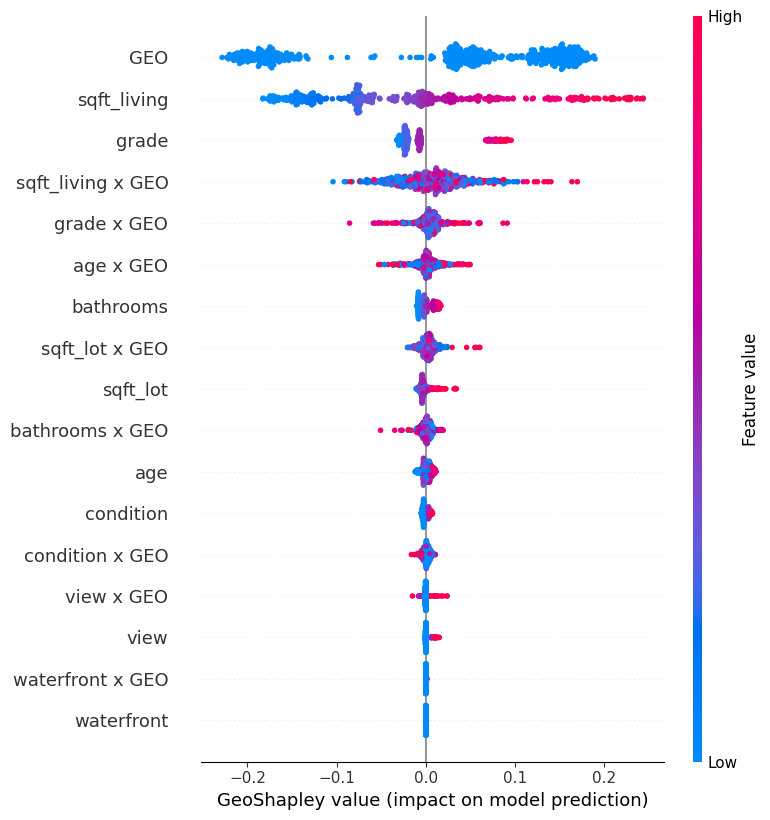

In [11]:
rslt.summary_plot(dpi=100)

In [12]:
rslt.summary_statistics()

,min,25%,50%,75%,max,mean,std,abs. mean
GEO,-2.284184e-01,-1.562885e-01,5.123219e-02,1.376585e-01,0.189565,0.015890,0.136545,0.123573
sqft_living,-1.827704e-01,-1.122559e-01,-3.481837e-02,2.767912e-02,0.243498,-0.023334,0.105784,0.087914
grade,-3.261789e-02,-2.361404e-02,-2.121148e-02,-6.526605e-03,0.095645,-0.001834,0.038299,0.029601
sqft_living x GEO,-1.040914e-01,-1.265071e-02,8.737006e-03,2.710955e-02,0.169768,0.009008,0.038329,0.029124
grade x GEO,-8.551077e-02,-5.992953e-04,4.636556e-03,9.724017e-03,0.091186,0.004428,0.015392,0.010198
age x GEO,-5.303285e-02,-2.565397e-03,1.259445e-03,6.431891e-03,0.049614,0.001519,0.013178,0.008567
bathrooms,-1.046164e-02,-4.752410e-03,-1.318415e-03,8.874811e-03,0.016711,0.001267,0.007927,0.006691
sqft_lot x GEO,-2.075700e-02,-1.437279e-03,2.548682e-03,6.384997e-03,0.060637,0.002984,0.008709,0.006103
sqft_lot,-1.091817e-02,-4.634089e-03,-3.421165e-03,-1.068031e-03,0.034238,-0.001817,0.005987,0.004685
bathrooms x GEO,-5.081640e-02,-3.013613e-03,8.116366e-04,3.913654e-03,0.019528,0.000220,0.006294,0.004389


100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


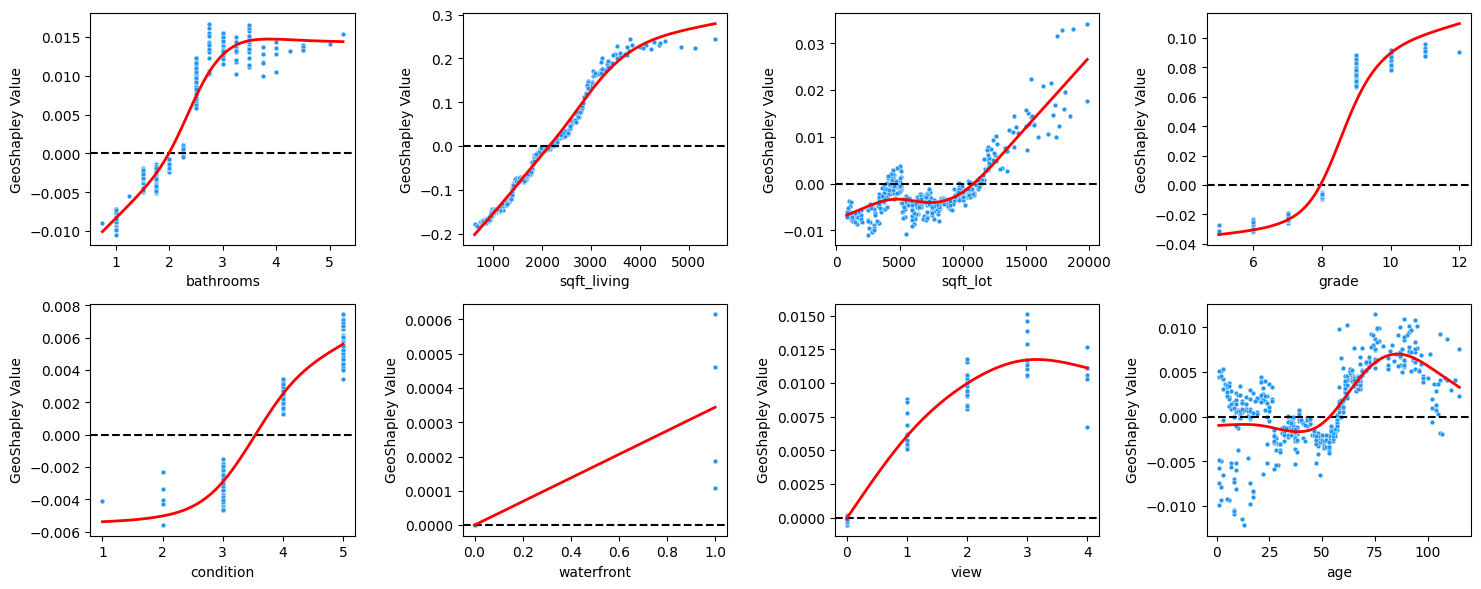

In [13]:
rslt.partial_dependence_plots(figsize=(15,6),max_cols=4,gam_curve=True)